# Setup

In [15]:
import sys

assert sys.version_info >= (3, 7)

In [16]:
pip install gymnasium[box2d] torch

  Using cached gymnasium-0.29.1-py3-none-any.whl (953 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached swig-4.2.1-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.9 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  

In [17]:
from packaging import version
import tensorflow as tf
from tensorflow.python.framework import ops

assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [18]:
if "google.colab" in sys.modules or "kaggle_secrets" in sys.modules:
    %pip install -q -U gymnasium swig
    %pip install -q -U gymnasium[classic_control,box2d,atari,accept-rom-license]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.2 MB/s eta 0:00:00


In [19]:
import numpy as np
import time

In [20]:
import matplotlib.animation
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('animation', html='jshtml')

In [21]:
from pathlib import Path

IMAGES_PATH = Path() / "policy gradient"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [22]:
import gymnasium as gym
env = gym.make(
    "LunarLander-v2",
    render_mode="rgb_array"
)

In [23]:
env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([ 3.1738280e-04,  1.4053628e+00,  3.2130983e-02, -2.4699315e-01,
        -3.6096358e-04, -7.2781518e-03,  0.0000000e+00,  0.0000000e+00],
       dtype=float32),
 {})

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
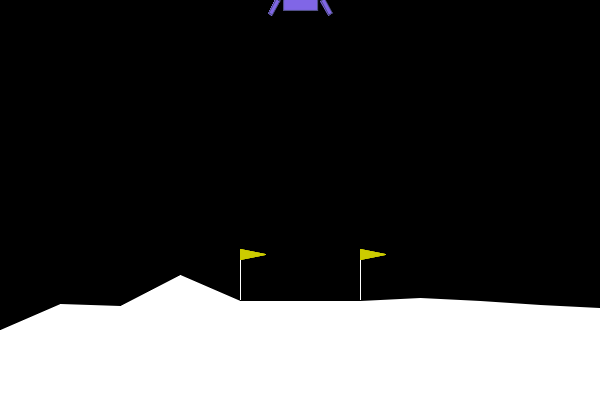

In [24]:
  env.render()

# Startup

In [25]:
img = env.render()
img.shape

(400, 600, 3)

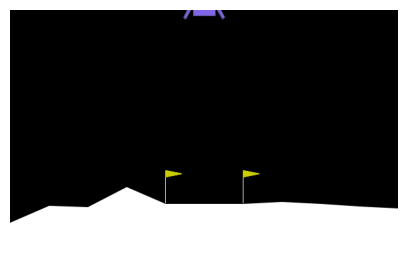

In [26]:
def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

In [27]:
env.action_space

Discrete(4)

In [28]:
action = 1
obs, reward, done, truncated, info = env.step(action)
obs

array([ 5.6114199e-04,  1.3992203e+00,  2.2870351e-02, -2.7299985e-01,
        1.1278267e-03,  2.9779319e-02,  0.0000000e+00,  0.0000000e+00],
      dtype=float32)

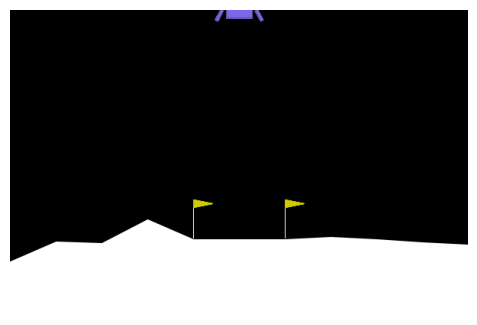

In [29]:
plot_environment(env)
save_fig("plot")
plt.show()

In [30]:
if done or truncated:
    obs, info = env.reset()

# Random policy

In [31]:
def Random_Agent_Policy(obs):
  return env.action_space.sample()
  # sample takes a random action within the action_space

In [32]:
totals = []
for episode in range(1000):
    episode_rewards = 0
    obs, info = env.reset(seed=episode)
    for step in range(1000):
        action = Random_Agent_Policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward
        if done or truncated:
            break

    totals.append(episode_rewards)

In [33]:
np.mean(totals), np.std(totals), min(totals), max(totals)

(-183.13868663993324,
 105.00220549168561,
 -569.8033058235876,
 51.554638978581636)

In [34]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = matplotlib.animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

def show_one_episode(policy, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("LunarLander-v2", render_mode="rgb_array")
    np.random.seed(seed)
    obs, info = env.reset(seed=seed)
    for step in range(n_max_steps):
        frames.append(env.render())
        action = policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        if done or truncated:
            break
    env.close()
    return plot_animation(frames)

show_one_episode(Random_Agent_Policy)

# Policy gradient

In [35]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)


In [37]:
env = gym.make('LunarLander-v2', render_mode='human')
input_size = env.observation_space.shape[0]
output_size = env.action_space.n

policy_network = PolicyNetwork(input_size, output_size)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [38]:
def train(policy_network, num_episodes, gamma, learning_rate):
    optimizer = optim.Adam(policy_network.parameters(), lr=learning_rate)

    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        log_probs = []
        rewards = []

        while True:
            state = torch.FloatTensor(state)
            action_probs = policy_network(state)
            action_distribution = torch.distributions.Categorical(action_probs)
            action = action_distribution.sample()
            log_prob = action_distribution.log_prob(action)
            log_probs.append(log_prob)

            next_state, reward, done, _ = env.step(action.item())
            rewards.append(reward)

            state = next_state

            if done:
                break

        episode_rewards.append(sum(rewards))

        discounts = [gamma**i for i in range(len(rewards))]
        discounted_rewards = [discount * reward for discount, reward in zip(discounts, rewards)]
        discounted_rewards = torch.tensor(discounted_rewards)
        discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-9)

        policy_loss = []
        for log_prob, reward in zip(log_probs, discounted_rewards):
            policy_loss.append(-log_prob * reward)
        policy_loss = torch.stack(policy_loss).sum()

        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

        if (episode+1) % 10 == 0:
            print(f"Episode {episode+1}/{num_episodes}, Reward: {episode_rewards[-1]}")

    return episode_rewards


In [41]:
num_episodes = 1500
gamma = 0.99
learning_rate = 0.01

episode_rewards = train(policy_network, num_episodes, gamma, learning_rate)


plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Progress')
plt.show()


Episode 10/1500, Reward: -238.61686552525998
Episode 20/1500, Reward: -228.82484359652423
Episode 30/1500, Reward: -316.43258612317106
Episode 40/1500, Reward: -363.47042875399706
Episode 50/1500, Reward: -254.78209019202808
Episode 60/1500, Reward: -377.60386797732144
Episode 70/1500, Reward: -116.15100667647599
Episode 80/1500, Reward: -269.5237767183694


KeyboardInterrupt: 

In [40]:
print("Gennemsnitlig reward:", np.mean(episode_rewards))
print("Standardafvigelse for rewards:", np.std(episode_rewards))
print("min og max for rewards:", min(episode_rewards), max(episode_rewards))

Gennemsnitlig reward: -225.58089591956454
Standardafvigelse for rewards: 0.0


TypeError: 'numpy.float64' object is not iterable

In [45]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.multiprocessing as mp

class PolicyNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)

def worker(process_id, policy_network, num_episodes, gamma, best_episode_dict, rewards_list):
    env = gym.make('LunarLander-v2')
    input_size = env.observation_space.shape[0]
    output_size = env.action_space.n

    optimizer = optim.Adam(policy_network.parameters(), lr=learning_rate)
    best_episode = {'reward': float('-inf'), 'states': [], 'actions': []}

    local_rewards = []

    for episode in range(process_id, num_episodes, num_processes):
        state = env.reset()
        log_probs = []
        rewards = []
        states = []
        actions = []

        while True:
            state = torch.FloatTensor(state)
            action_probs = policy_network(state)
            action_distribution = torch.distributions.Categorical(action_probs)
            action = action_distribution.sample()
            log_prob = action_distribution.log_prob(action)
            log_probs.append(log_prob)

            states.append(state)
            actions.append(action)

            next_state, reward, done, _ = env.step(action.item())
            rewards.append(reward)

            state = next_state

            if done:
                break

        episode_reward = sum(rewards)
        local_rewards.append(episode_reward)

        if episode_reward > best_episode['reward']:
            best_episode['reward'] = episode_reward
            best_episode['states'] = states
            best_episode['actions'] = actions

        discounts = [gamma**i for i in range(len(rewards))]
        discounted_rewards = [discount * reward for discount, reward in zip(discounts, rewards)]
        discounted_rewards = torch.tensor(discounted_rewards)
        discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-9)

        policy_loss = []
        for log_prob, reward in zip(log_probs, discounted_rewards):
            policy_loss.append(-log_prob * reward)
        policy_loss = torch.stack(policy_loss).sum()

        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()

    best_episode_dict[process_id] = best_episode
    rewards_list[process_id] = local_rewards

if __name__ == '__main__':
    num_processes = mp.cpu_count()  # Number of CPU cores
    processes = []
    manager = mp.Manager()
    best_episode_dict = manager.dict()
    rewards_list = manager.dict()

    # Shared policy network
    policy_network = PolicyNetwork(input_size, output_size)
    policy_network.share_memory()

    num_episodes = 1500
    gamma = 0.96
    learning_rate = 0.02

    # Start workers
    for process_id in range(num_processes):
        p = mp.Process(target=worker, args=(process_id, policy_network, num_episodes, gamma, best_episode_dict, rewards_list))
        p.start()
        processes.append(p)

    # Wait for all processes to finish
    for p in processes:
        p.join()

    # Find the best episode among all workers
    best_episode = max(best_episode_dict.values(), key=lambda x: x['reward'])

    # Combine rewards from all workers
    all_rewards = []
    for rewards in rewards_list.values():
        all_rewards.extend(rewards)

    # Compute and print statistics
    print("Mean reward:", np.mean(all_rewards))
    print("Standard deviation of reward:", np.std(all_rewards))
    print("Min reward:", np.min(all_rewards))
    print("Max reward:", np.max(all_rewards))

    # plt.plot(episode_rewards)
    # plt.xlabel('Episode')
    # plt.ylabel('Reward')
    # plt.title('Training Progress')
    # plt.show()

    # Render the best episode
    env = gym.make('LunarLander-v2', render_mode='human')
    env.reset()
    for state, action in zip(best_episode['states'], best_episode['actions']):
        env.render()
        env.step(action.item())
    env.close()


Mean reward: -174.90460545063635
Standard deviation of reward: 121.89765285878767
Min reward: -611.6416432741476
Max reward: 212.72618355128657


In [ ]:
import torch
import torch.nn as nn
import torchviz
from torch.autograd import Variable

class PolicyNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)

# Definere netværket
input_size = 8  # Eksempel input størrelse for LunarLander-v2
output_size = 4  # Eksempel output størrelse for LunarLander-v2
policy_network = PolicyNetwork(input_size, output_size)

# Oprette en dummy input for visualisering
dummy_input = Variable(torch.rand(1, input_size))

# Visualisere netværket
dot = torchviz.make_dot(policy_network(dummy_input), params=dict(policy_network.named_parameters()))
dot.format = 'png'
dot.render('policy_network')
